## Importing libraries

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'
from tf_keras.optimizers import legacy

## Data Preprocessing

#### Divide into the dataset

In [46]:
import splitfolders
import os

# Tạo các thư mục đầu ra nếu chưa tồn tại
os.makedirs('output', exist_ok=True)
os.makedirs('output/train', exist_ok=True)
os.makedirs('output/val', exist_ok=True)
os.makedirs('output/test', exist_ok=True)

# Đường dẫn tới thư mục chứa dữ liệu gốc
loc = "D:\SkinDiseasesWeb"

# Chia dữ liệu theo tỷ lệ 80%, 10%, 10% cho train, val, test
splitfolders.ratio(loc, output="output", seed=42, ratio=(0.8, 0.1, 0.1))

Copying files: 7 files [00:00, 352.92 files/s]


### Training Image preprocessing

In [23]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'output/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 13892 files belonging to 5 classes.


### Validation Image Preprocessing

In [24]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'output/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1735 files belonging to 5 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [25]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [32]:
cnn.add(tf.keras.layers.Flatten())

In [33]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [34]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [35]:
cnn.add(tf.keras.layers.Dense(215, activation='relu'))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.3)) #To avoid overfitting

In [37]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

### Compiling and Training Phase

In [38]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Callbacks for learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [40]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 215)            │       322,715 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 215)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,109,519 (30.94 MB)

 Trainable params: 8,109,519 (30.94 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15, batch_size=64, callbacks=[reduce_lr, early_stopping])

Epoch 1/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.4989 - loss: 1.2557 - val_accuracy: 0.5383 - val_loss: 1.0926 - learning_rate: 0.0010
Epoch 2/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.6011 - loss: 0.9262 - val_accuracy: 0.6767 - val_loss: 0.7239 - learning_rate: 0.0010
Epoch 3/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.6622 - loss: 0.7851 - val_accuracy: 0.6559 - val_loss: 0.7773 - learning_rate: 0.0010
Epoch 4/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 718s 3s/step - accuracy: 0.7026 - loss: 0.7061 - val_accuracy: 0.6709 - val_loss: 0.7379 - learning_rate: 0.0010
Epoch 5/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.7264 - loss: 0.6574 - val_accuracy: 0.7222 - val_loss: 0.6569 - learning_rate: 0.0010
Epoch 6/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.7687 - loss: 0.5728 - val_accuracy: 0.7833 - val_loss: 0.5406 - learning_rate: 0.0010
Epoch 7/15
218/218 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.7799 - loss: 0.

## Evaluating Model

In [43]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

218/218 ━━━━━━━━━━━━━━━━━━━━ 99s 452ms/step - accuracy: 0.8679 - loss: 0.3140
Training accuracy: 0.8739562630653381


In [44]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - accuracy: 0.8759 - loss: 0.3183
Validation accuracy: 0.8645533323287964


### Saving Model

In [45]:
cnn.save('trained_skin_disease_model.keras')

In [46]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5385113954544067,
  0.6260437369346619,
  0.6573567390441895,
  0.7135761380195618,
  0.7432335019111633,
  0.7735387086868286,
  0.7864238619804382,
  0.8015404343605042,
  0.8134897947311401,
  0.8302620053291321,
  0.8348689675331116,
  0.8371005058288574,
  0.8419954180717468,
  0.845018744468689,
  0.8570400476455688],
 'loss': [1.124616026878357,
  0.8710141777992249,
  0.8075916171073914,
  0.684133768081665,
  0.6251247525215149,
  0.5626850128173828,
  0.529295802116394,
  0.5072113871574402,
  0.47054532170295715,
  0.4422836899757385,
  0.42519915103912354,
  0.4139788746833801,
  0.4114666283130646,
  0.37861108779907227,
  0.36015719175338745],
 'val_accuracy': [0.5383285284042358,
  0.6766570806503296,
  0.6559078097343445,
  0.6708933711051941,
  0.7221902012825012,
  0.7832853198051453,
  0.7682996988296509,
  0.7844380140304565,
  0.8242074847221375,
  0.8161383271217346,
  0.81902015209198,
  0.8380403518676758,
  0.8438040614128113,
  0.86455333232879

In [47]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [48]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


## Accuracy Visualization

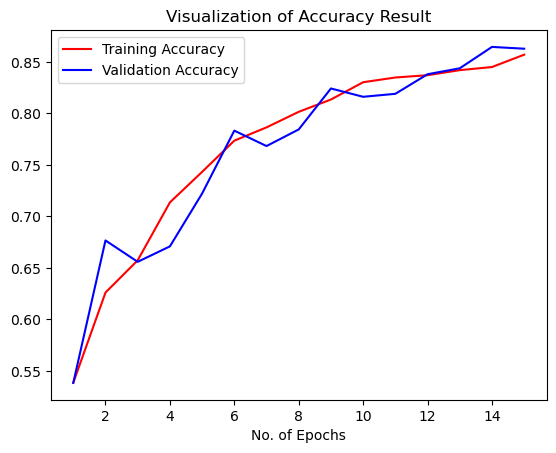

In [49]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [50]:
class_name = validation_set.class_names

In [51]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'output/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1735 files belonging to 5 classes.


In [52]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1735/1735 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step


In [88]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [89]:
Y_true

<tf.Tensor: shape=(1735,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [90]:
predicted_categories

<tf.Tensor: shape=(1735,), dtype=int64, numpy=array([2, 2, 2, ..., 4, 4, 4], dtype=int64)>

In [91]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [92]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                    precision    recall  f1-score   support

                    1. Eczema 1677       0.77      0.67      0.72       167
                2. Melanoma 15.75k       0.81      0.92      0.87       314
      3. Atopic Dermatitis - 1.25k       0.56      0.63      0.59       125
4. Basal Cell Carcinoma (BCC) 3323       0.93      0.86      0.89       332
   5. Melanocytic Nevi (NV) - 7970       0.92      0.91      0.92       797

                          accuracy                           0.86      1735
                         macro avg       0.80      0.80      0.80      1735
                      weighted avg       0.86      0.86      0.86      1735



### Confusion Matrix Visualization

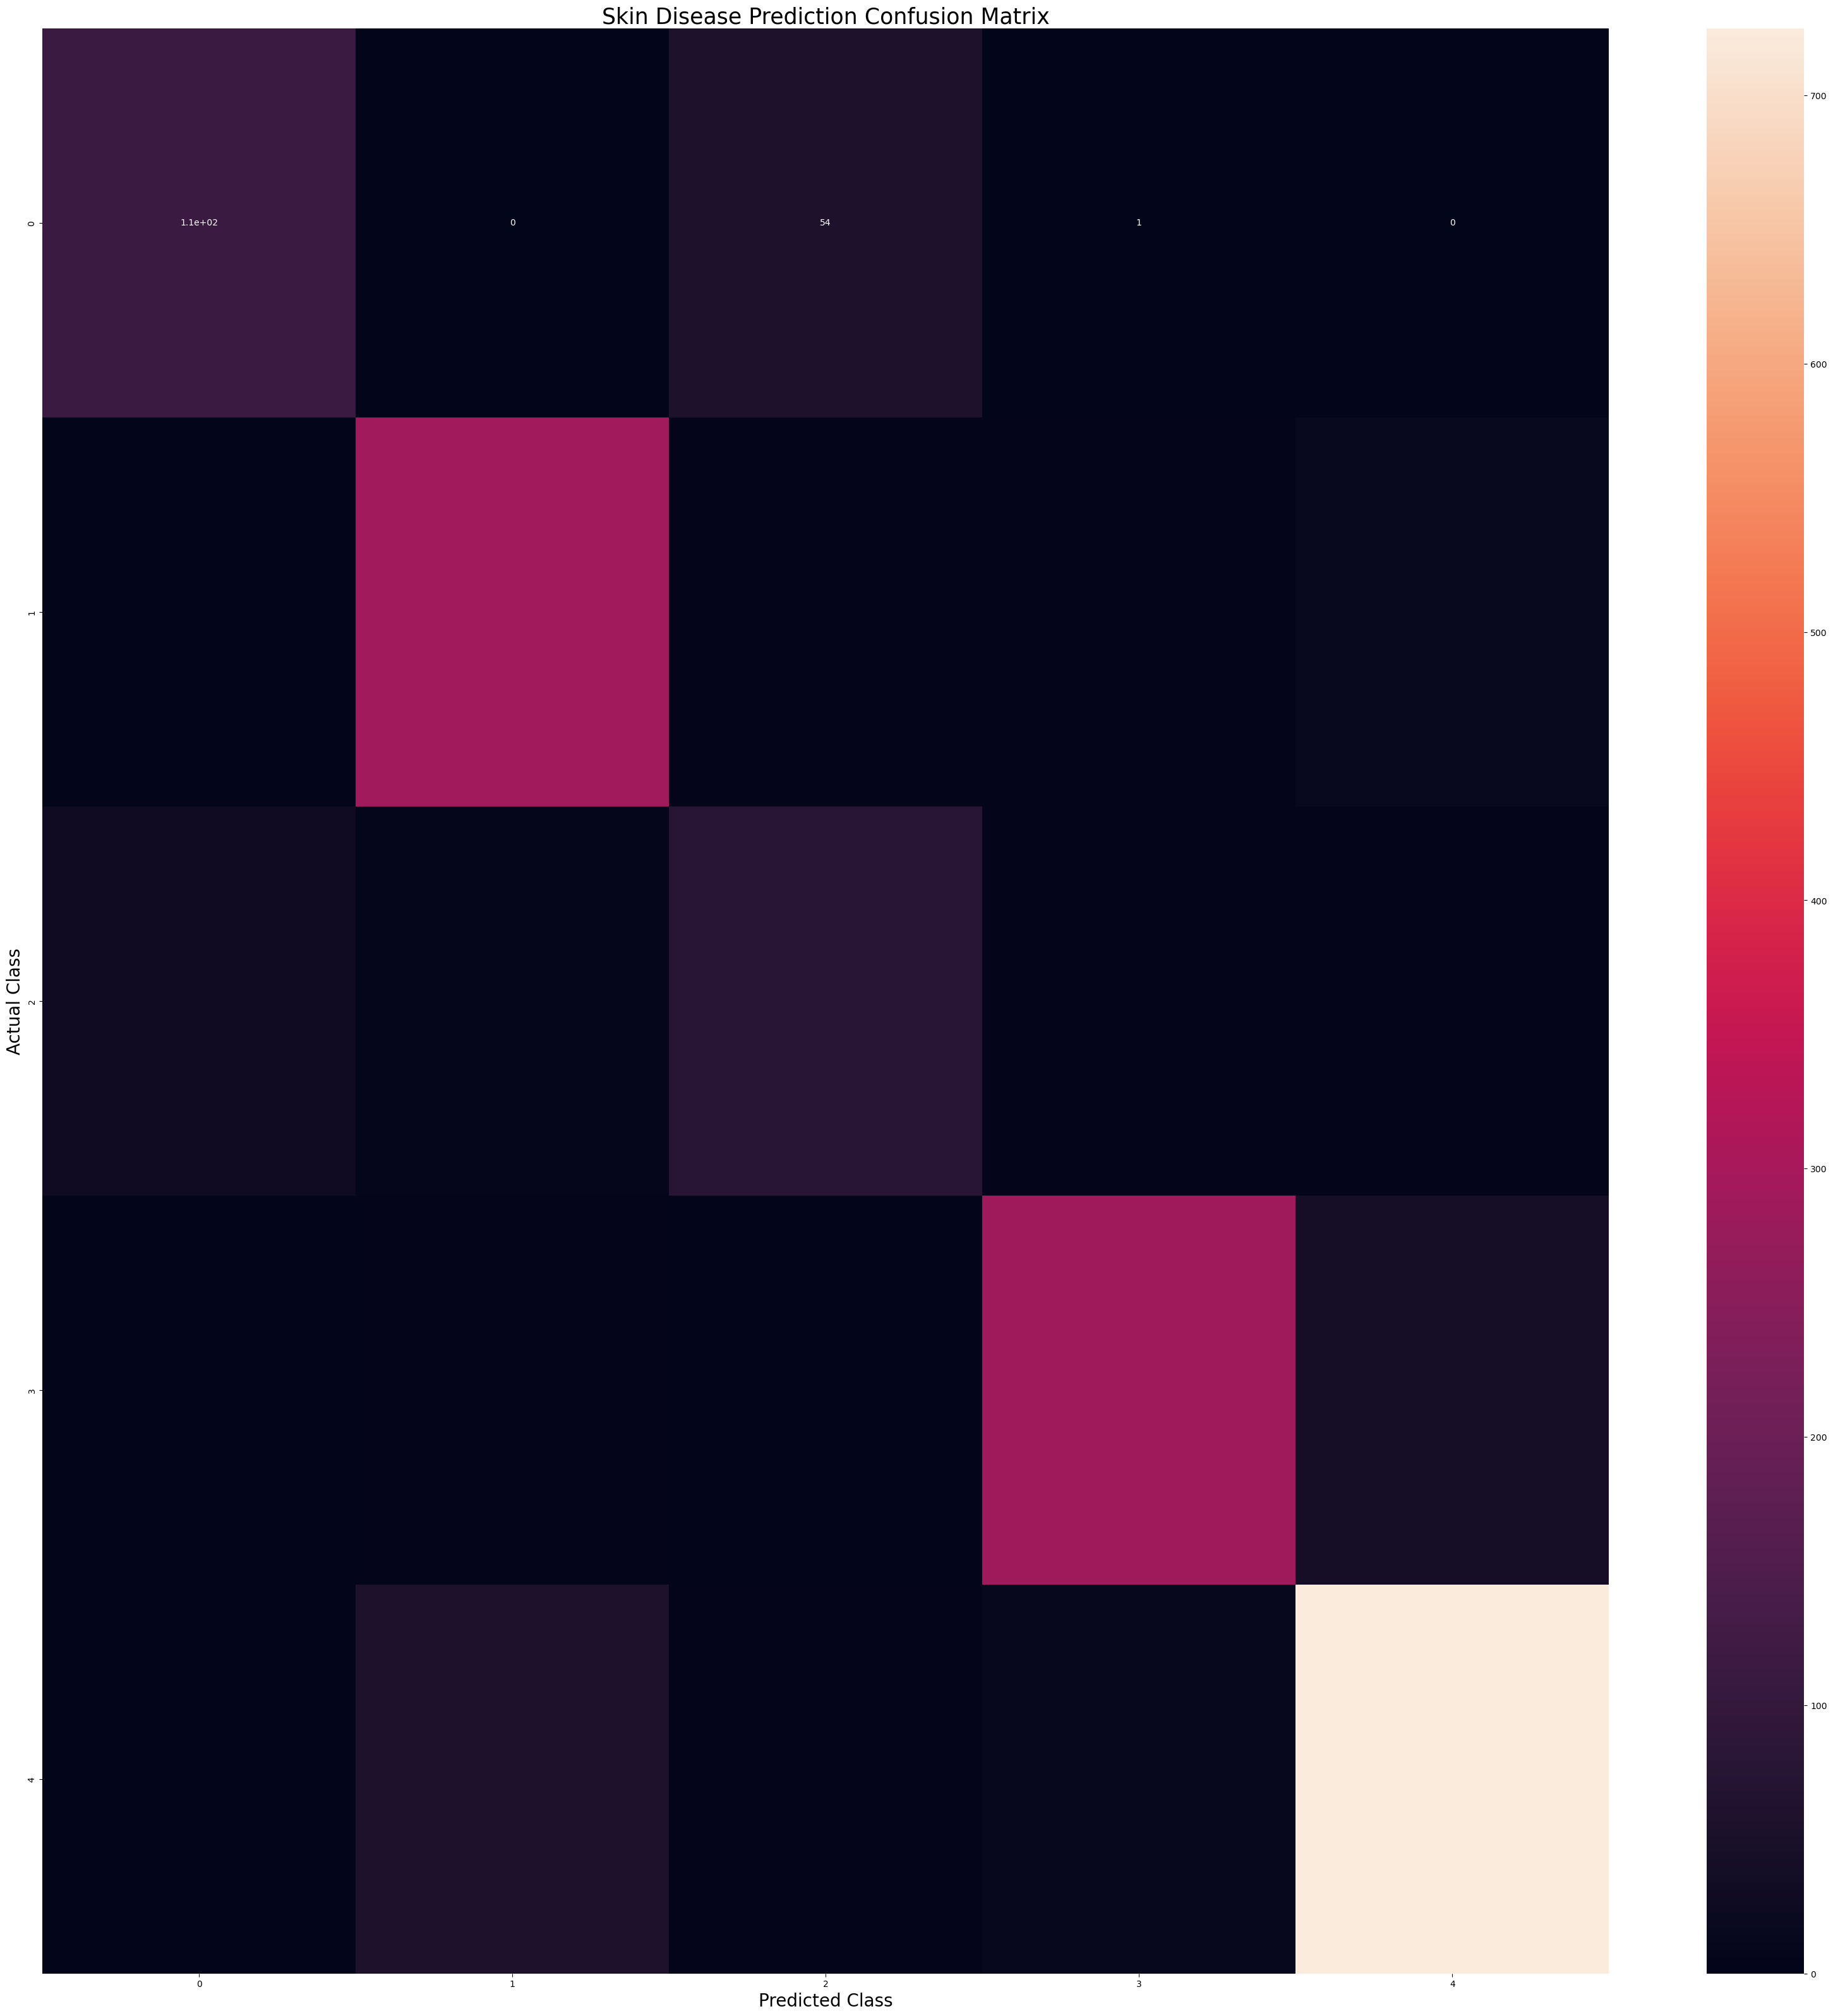

In [94]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Skin Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()